In [1]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv.csv to dataset.csv.csv


Dataset Shape: (9551, 21)

Missing Values:
 ï»¿Restaurant ID        0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Data Types:
 ï»¿Restaurant ID          int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object

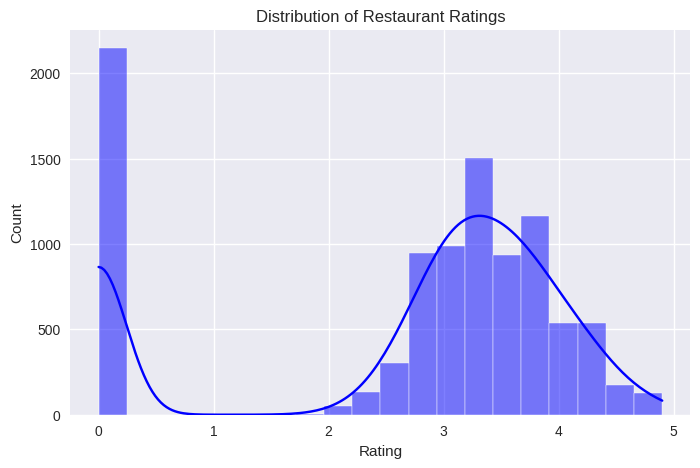

<Figure size 800x550 with 0 Axes>

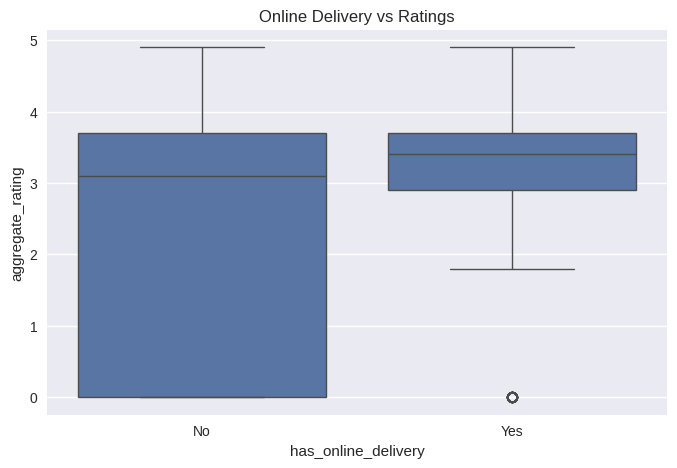

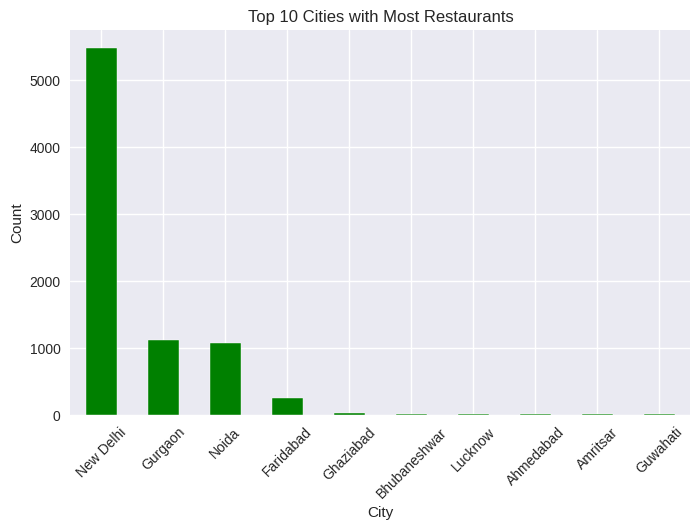

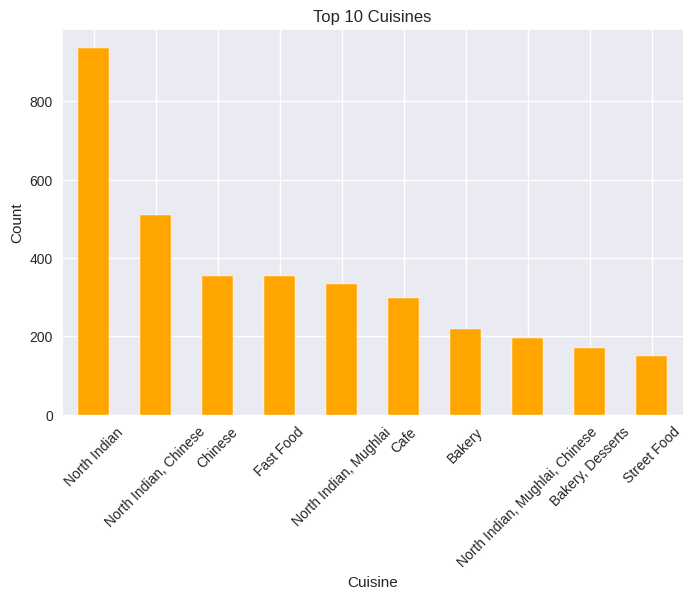

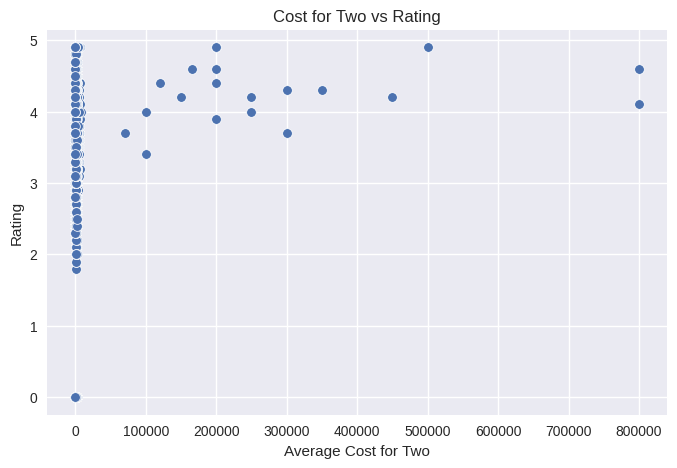

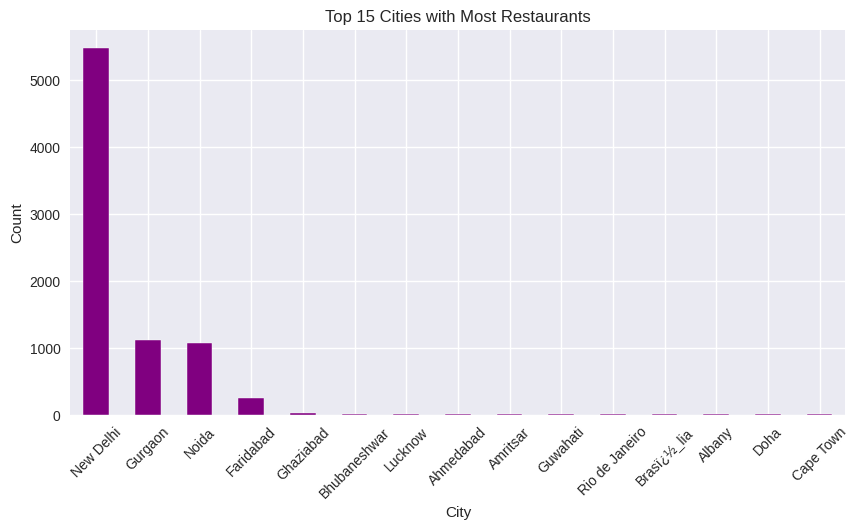

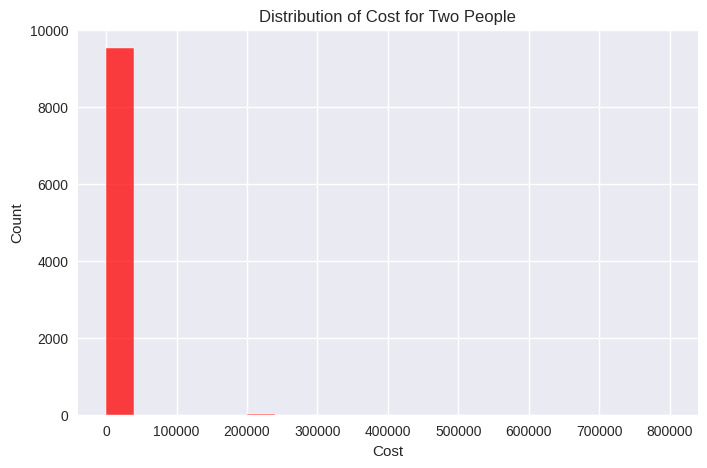

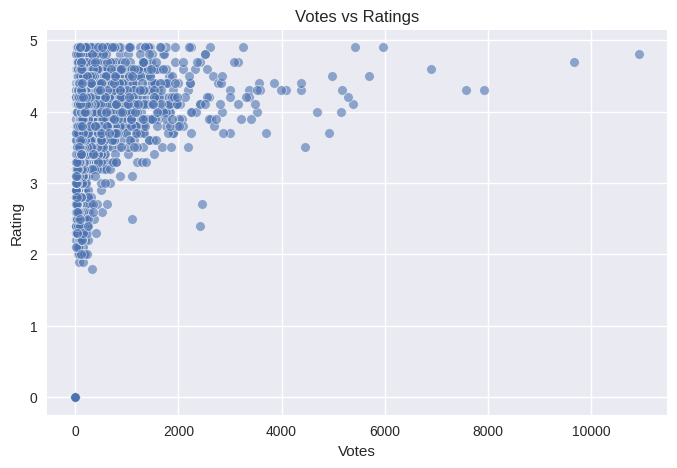

<Figure size 800x550 with 0 Axes>

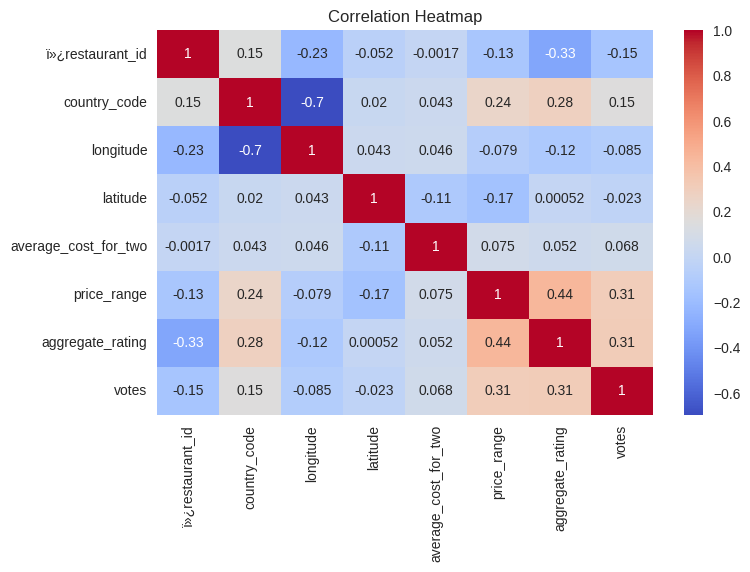

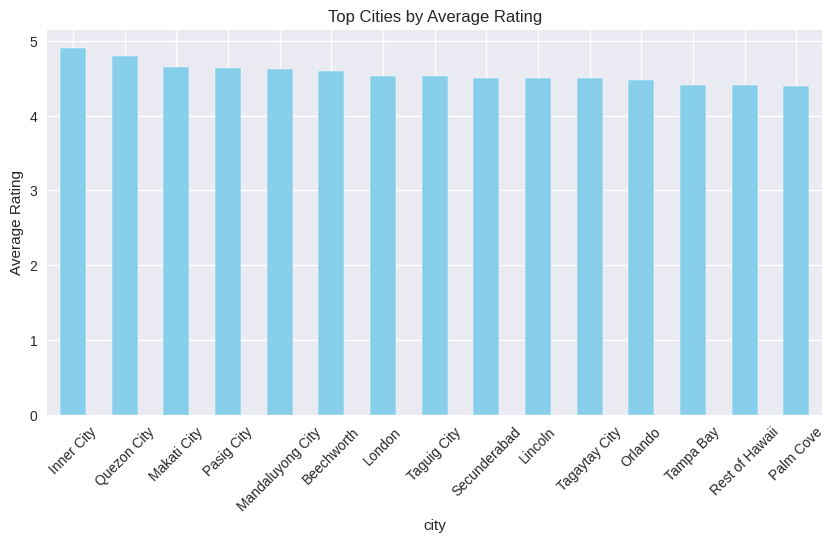

EDA Completed!


In [12]:
# Zomato Dataset EDA - Fixed for Your Column Names

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dataset.csv", encoding='latin-1')

# -----------------
# Basic Exploration
# -----------------
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Clean numeric fields
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')
df['average_cost_for_two'] = pd.to_numeric(df['average_cost_for_two'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# -----------------
# Visualization Style
# -----------------
plt.style.use('seaborn-v0_8')

# 1. Distribution of Restaurant Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['aggregate_rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
# 2. Online Order vs Ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x='has_online_delivery', y='aggregate_rating', data=df)
plt.title("Online Delivery vs Ratings")
plt.show()

# 3. Top 10 Cities with Most Restaurants
plt.figure(figsize=(8, 5))
df['city'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4. Top 10 Cuisines
plt.figure(figsize=(8, 5))
df['cuisines'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5. Approx Cost vs Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='average_cost_for_two', y='aggregate_rating', data=df)
plt.title("Cost for Two vs Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Rating")
plt.show()

# 6. City-wise Restaurant Count
plt.figure(figsize=(10, 5))
df['city'].value_counts().head(15).plot(kind='bar', color='purple')
plt.title("Top 15 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 7. Cost Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['average_cost_for_two'].dropna(), bins=20, color='red')
plt.title("Distribution of Cost for Two People")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.show()

# 8. Votes vs Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='votes', y='aggregate_rating', data=df, alpha=0.6)
plt.title("Votes vs Ratings")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
# 9. Heatmap of Numeric Correlations
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 10. City vs Average Rating
plt.figure(figsize=(10, 5))
avg_rating = df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False).head(15)
avg_rating.plot(kind='bar', color='skyblue')
plt.title("Top Cities by Average Rating")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

print("EDA Completed!")


# New Section